In [ ]:
# Load necessary packages
import pandas as pd
import numpy as np
!pip install sweetviz
import sweetviz
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 1. INTRODUCTION


> This project employed Airline Quality Ratings dataset to determine the relationship between relevant factors and Passengers' Satisfaction level of their flights. This satisfaction was measured by nearly 130000 airline passengers.

> Relevant factors can be classified into 2 main groups, which are **Passenger information** and **Flight features**.

1. Group **Passenger information** includes features related to each passenger:

- ID: Passenger ID
- Gender: Passenger gender (Male, Female)
- Age: Passenger age
- Customer Type: Customer type of passenger (Returning, First-time)
- Type of Travel: Purpose of the flight of passenger (Business, Personal)
- Class: Travel class in the plane of passenger (Business, Economy, Economy Plus)

2. Group **Flight features** comprises of each flight's characteristics, and passenger's evaluation of each flight's features, which ranges from 0 to 5.

- Flight Distance: The distance between the departing place and the destination of each flight
- Departure Delay: Minutes delayed when passengers depart
- Arrival Delay: Minutes delayed when passengers arrive
- Departure and Arrival Time Convenience: Passenger evaluation of the convenience of departure and arrival times
- Ease of Online Booking: Passenger evaluation of the ease of online booking
- Check-in Service: Passenger evaluation of the ease of check-in service
- Online Boarding: Passenger evaluation of the convenience of online boarding
- Gate Location: Passenger evaluation of the gate location estimation
- On-board Service: Passenger evaluation of the service on board
- Seat Comfort: Passenger evaluation of their seat's comfort
- Leg Room Service: Passenger evaluation of their legroom (Legroom is the amount of space between passenger's seat and the seat in front of them on a plane)
- Cleanliness: Passenger evaluation of the aircraft's cleanliness
- Food and Drink: Passenger evaluation of the quality of food and drinks
- In-flight Service: Passenger evaluation of the level of service in flight
- In-flight Wifi Service: Passenger evaluation of the wifi quality in flight
- In-flight Entertainment: Passenger evaluation of the in-flight entertainment
- Baggage Handling: Passenger evaluation of baggle handling

> These above factors were then used to measure the overall passenger's satisfaction level, which was presented in the target variable (**Satisfaction**: Neutral or Dissatisfied, Satisfied).


## 2. DATA PRE-PROCESSING AND DATA CLEANING


In [ ]:
# Load the dataset
data = pd.read_csv('/content/sample_data/Airline Quality Ratings.csv')
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
# Check the range of each column in the dataset
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# The number of missing values in Arrival Delay column
data['Arrival Delay'].isnull().sum()

393

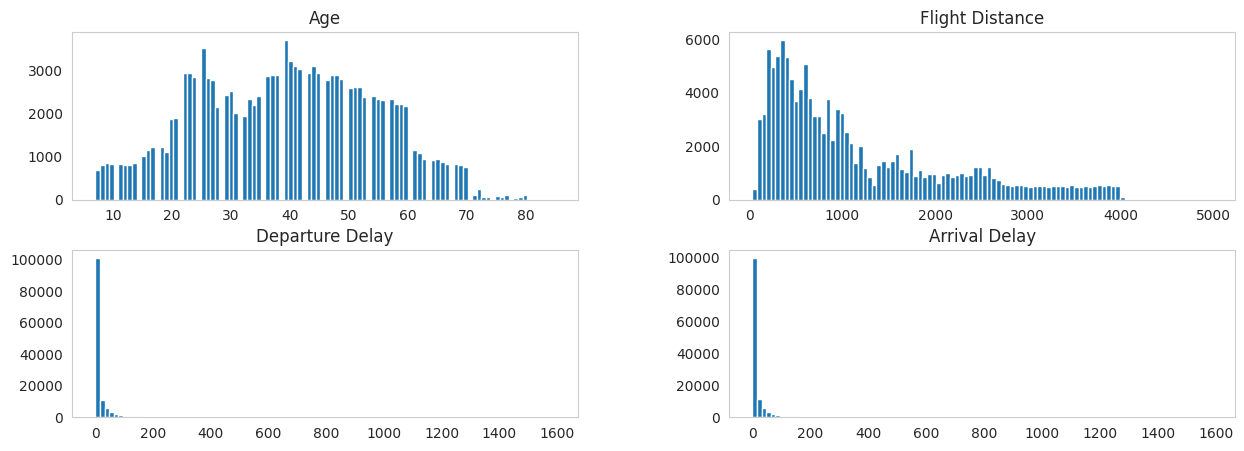

In [ ]:
# Checking numerical variables' distribution
data[['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay']].hist(figsize = (15,5), bins = 100, layout = (2,2), grid = False)
plt.show()

> After checking the data range, it can be seen that:

- All columns representing for passenger's evaluation did not include any outliers or invalid values since their values were between 0 and 5. Other variables also do not have invalid values.
- Only **Arrival Delay** column had missing values in this dataset (particularly 393 missing values).
- **Age** column seems to approximate a normal distribution, while the distribution of **Flight Distance** was pretty right-skewed.
- The distribution of **Departure Delay** and **Arrival Delay** were significantly right-skewed since the majority of their data were less than about 150 minutes, meaning that there can be a lot of potential outliers in these variables.


### Handling missing values in Arrival Delay variable


> Since there were 393 missing values existing in **Arrival Delay** column, and this variable's distribution was right-skewed, its median was employed to replace these missing values.


In [ ]:
# Fill missing values with the median
median_arrival_delay = data['Arrival Delay'].median()
data['Arrival_Delay_filled'] = data['Arrival Delay'].fillna(median_arrival_delay)

In [ ]:
# Check missing values in Arrival Delay after imputation
data['Arrival_Delay_filled'].isnull().any()

False

### Checking datatype and encoding values


In [ ]:
# Checking data type of each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

> After checking, many variables should be converted to categorical variables, including Gender, Customer Type, Type of Travel, Class, and other variables presenting passenger's evaluation of flight's features. The target variable **Satisfaction** should also be converted to a categorical variable.

> After modifying data type and encoding values, each column's classes were presented as follows:

- Gender: 1 is Male, 0 shows Female
- Customer Type: 1 represents for Returning, 0 shows First-time
- Type of Travel: 1 represents for Business, 0 represents for Personal
- Class: 0 shows Economy, Economy Plus is 1, and Business is 2


In [ ]:
# Customer Type: Returning = 1, First-time = 0
data['Customer_Type_encoded'] = data['Customer Type'].apply(lambda x: 1 if x == 'Returning' else 0)
data['Customer_Type_encoded'] = pd.Categorical(data['Customer_Type_encoded'], categories = [0,1])
print(data['Customer Type'].value_counts())
print(data['Customer_Type_encoded'].value_counts())

Customer Type
Returning     106100
First-time     23780
Name: count, dtype: int64
Customer_Type_encoded
1    106100
0     23780
Name: count, dtype: int64


In [ ]:
# Travel Type: Business = 1, Personal = 0
print(data['Type of Travel'].value_counts())
data['Travel_Type_encoded'] = data['Type of Travel'].apply(lambda x: 1 if x == 'Business' else 0)
data['Travel_Type_encoded'] = pd.Categorical(data['Travel_Type_encoded'], categories = [0,1])
print(data['Travel_Type_encoded'].value_counts())

Type of Travel
Business    89693
Personal    40187
Name: count, dtype: int64
Travel_Type_encoded
1    89693
0    40187
Name: count, dtype: int64


In [ ]:
# Gender: Male = 1, Female = 0
print(data.Gender.value_counts())
data['Gender_encoded'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
data['Gender_encoded'] = pd.Categorical(data['Gender_encoded'], categories = [0,1])
print(data.Gender_encoded.value_counts())

Gender
Female    65899
Male      63981
Name: count, dtype: int64
Gender_encoded
0    65899
1    63981
Name: count, dtype: int64


In [ ]:
# Class: Business = 2, Economy Plus = 1, Economoy = 0
data['Class_encoded'] = data['Class'].apply(lambda x: 2 if x == 'Business' else (1 if x == 'Economy Plus' else 0))
data['Class_encoded'] = pd.Categorical(data['Class_encoded'], categories = [0,1,2])
print(data.Class.value_counts())
print(data['Class_encoded'].value_counts())

Class
Business        62160
Economy         58309
Economy Plus     9411
Name: count, dtype: int64
Class_encoded
2    62160
0    58309
1     9411
Name: count, dtype: int64


In [ ]:
# Convert other passenger evaluation columns to categorical variables
passenger_evaluation = ['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']

for i in passenger_evaluation:
  data[i] = pd.Categorical(data[i], categories = [0,1,2,3,4,5])

In [ ]:
# Convert Satisfaction variable to a categorical variable
data.Satisfaction = pd.Categorical(data.Satisfaction, categories = ['Neutral or Dissatisfied', 'Satisfied'])

### Feature selection


> After encoding classes in categorical variables, their respective old columns were dropped out of the dataset. Column **ID** was also removed since it did not have any relationship with passenger satisfaction level. The final dataset includes 129880 observations, 22 independent variables, and 1 target variable, as shown below.


In [ ]:
# Original columns
original_columns = data.columns
original_columns

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction',
       'Arrival_Delay_filled', 'Customer_Type_encoded', 'Travel_Type_encoded',
       'Gender_encoded', 'Class_encoded'],
      dtype='object')

In [ ]:
# Considered variables
need_columns = ['Gender_encoded', 'Customer_Type_encoded', 'Travel_Type_encoded', 'Class_encoded',
       'Age', 'Flight Distance', 'Departure Delay', 'Arrival_Delay_filled',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction']
need_columns

['Gender_encoded',
 'Customer_Type_encoded',
 'Travel_Type_encoded',
 'Class_encoded',
 'Age',
 'Flight Distance',
 'Departure Delay',
 'Arrival_Delay_filled',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling',
 'Satisfaction']

In [ ]:
# Take encoded data, only including necessary variables
data_encode = data.loc[:, need_columns]
data_encode.shape

(129880, 23)

In [ ]:
data_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   Gender_encoded                          129880 non-null  category
 1   Customer_Type_encoded                   129880 non-null  category
 2   Travel_Type_encoded                     129880 non-null  category
 3   Class_encoded                           129880 non-null  category
 4   Age                                     129880 non-null  int64   
 5   Flight Distance                         129880 non-null  int64   
 6   Departure Delay                         129880 non-null  int64   
 7   Arrival_Delay_filled                    129880 non-null  float64 
 8   Departure and Arrival Time Convenience  129880 non-null  category
 9   Ease of Online Booking                  129880 non-null  category
 10  Check-in Service                

> Correlation plot was generated to identify linear relationship between variables in the dataset.


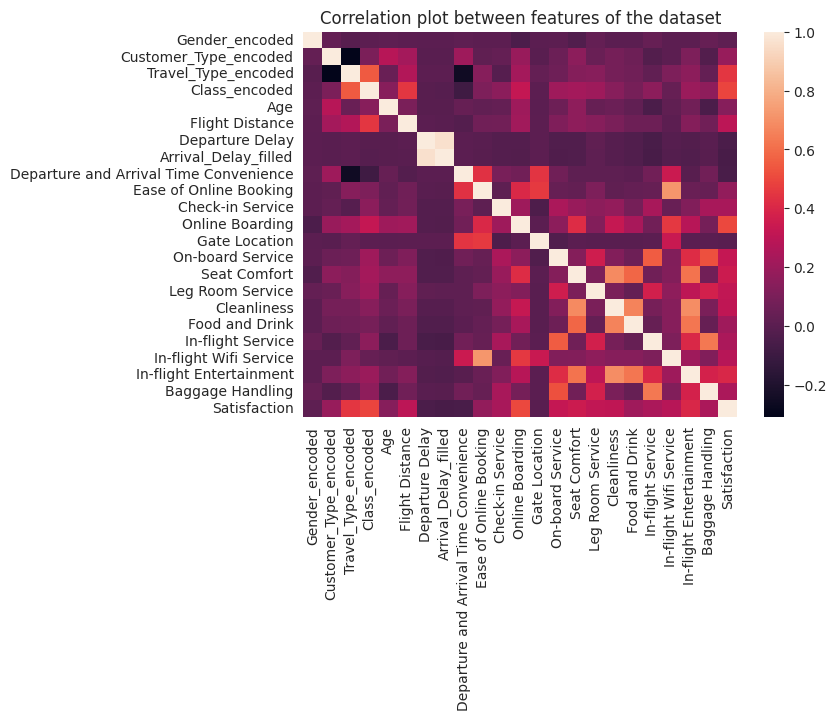

In [ ]:
# Correlation plot
data_corr = data_encode.loc[:,:].copy()
data_corr.Satisfaction = data_corr.Satisfaction.apply(lambda x: 1 if x == 'Satisfied' else 0)
for i in data_corr.columns:
  data_corr[i] = data_corr[i].astype('int64')

fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(data_corr.corr())
plt.title('Correlation plot between features of the dataset')
plt.show()

> According to the above correlation plot, various pairs of variables had medium linear relationship between its features. For example, Class and Travel Type has a medium linear relationship with correlation coefficient of about 0.545. Additionally, the figures for the pair of In-flight Entertainment and Cleanliness was 0.693. These positive correlation coefficients means that these variables tend to change in the same direction. If passengers give high score for 1 variable, they also tend to give high score for the another variable in the pair.

> Arrival Delay and Departure Delay were highly linearly correlated to each other, with their correlation coefficient of up to 0.959, which indicated the Multicollinearity problem. Because their values move together significantly, and Arrival Delay had slightly higher correlation to satisfaction level than Departure Delay, the Departure Delay variable should be removed from the dataset.


> After removing the Departure Delay variable, the final correlation plot and a table of correlation coefficients were presented as below.


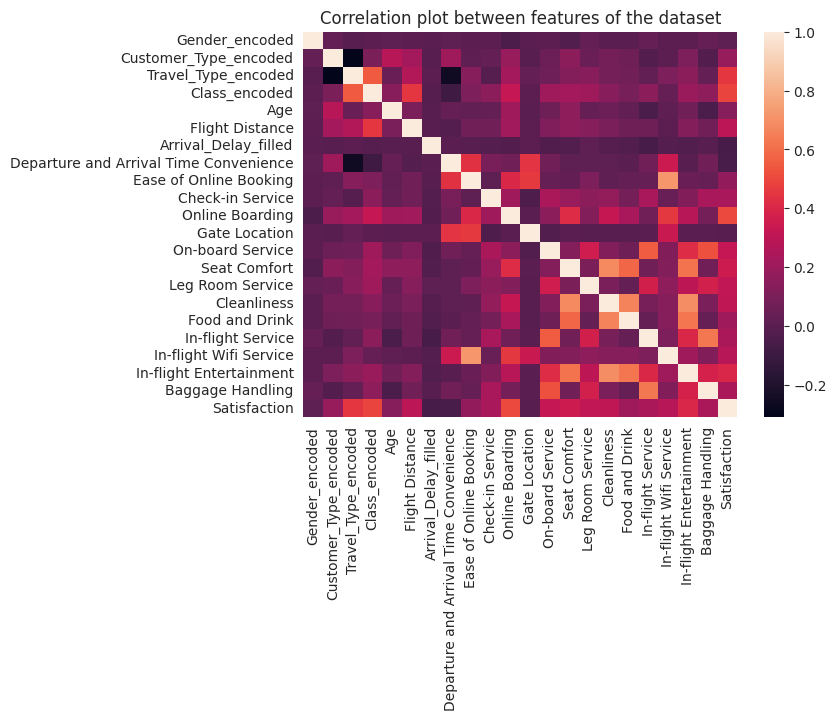

In [ ]:
# Correlation plot after dropping Departure Delay column
data_corr.drop('Departure Delay', axis = 1, inplace = True)
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(data_corr.corr())
plt.title('Correlation plot between features of the dataset')
plt.show()

In [ ]:
# Table of correlation coefficient
data_corr.corr()

,Gender_encoded,Customer_Type_encoded,Travel_Type_encoded,Class_encoded,Age,Flight Distance,Arrival_Delay_filled,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
Gender_encoded,1.000000,0.030958,-0.009503,0.005774,0.008996,0.003616,0.001286,0.008995,0.005893,0.008462,...,0.006447,-0.030756,0.031047,0.002867,0.001730,0.038504,0.005901,0.003843,0.036356,0.011236
Customer_Type_encoded,0.030958,1.000000,-0.308236,0.105641,0.284172,0.226021,-0.004769,0.206873,0.018059,0.031243,...,0.054172,0.156239,0.046841,0.081302,0.056997,-0.023292,0.005757,0.106001,-0.024874,0.186017
Travel_Type_encoded,-0.009503,-0.308236,1.000000,0.545447,0.044808,0.266792,0.005972,-0.257102,0.134078,-0.016247,...,0.059794,0.127717,0.139612,0.084615,0.068986,0.023538,0.105865,0.152936,0.033012,0.449861
Class_encoded,0.005774,0.105641,0.545447,1.000000,0.140504,0.450814,-0.013974,-0.089976,0.107537,0.151299,...,0.211103,0.227368,0.206129,0.138491,0.088253,0.155864,0.036869,0.196246,0.161364,0.492947
Age,0.008996,0.284172,0.044808,0.140504,1.000000,0.099459,-0.011206,0.036960,0.022565,0.033475,...,0.057078,0.159136,0.039119,0.052565,0.023194,-0.051347,0.016116,0.074947,-0.047991,0.134091
Flight Distance,0.003616,0.226021,0.266792,0.450814,0.099459,1.000000,-0.001973,-0.018914,0.065165,0.073608,...,0.111194,0.157662,0.134533,0.095648,0.057066,0.059316,0.006701,0.130507,0.064855,0.298085
Arrival_Delay_filled,0.001286,-0.004769,0.005972,-0.013974,-0.011206,-0.001973,1.000000,-0.001005,-0.007046,-0.021675,...,-0.034671,-0.030397,0.011384,-0.016547,-0.031685,-0.059685,-0.017762,-0.030183,-0.007997,-0.058145
Departure and Arrival Time Convenience,0.008995,0.206873,-0.257102,-0.089976,0.036960,-0.018914,-0.001005,1.000000,0.437620,0.091132,...,0.067297,0.008666,0.010617,0.009862,0.000687,0.072195,0.344915,-0.008380,0.070833,-0.054270
Ease of Online Booking,0.005893,0.018059,0.134078,0.107537,0.022565,0.065165,-0.007046,0.437620,1.000000,0.008819,...,0.039064,0.028561,0.109450,0.015125,0.030514,0.035373,0.714807,0.046564,0.039148,0.168877
Check-in Service,0.008462,0.031243,-0.016247,0.151299,0.033475,0.073608,-0.021675,0.091132,0.008819,1.000000,...,0.244619,0.189979,0.152693,0.176658,0.085198,0.237601,0.043762,0.119554,0.234503,0.237252


> According to the later correlation plot and the above table showing correlation coefficient between variables, all considered features were seen to only have weak to medium linear relationship with Satisfaction variable. Class, Type of Travel, and Online Boarding were top 3 variables having the highest linear correlation to satisfaction level, with correlation coefficients of 0.49, 0.45, and 0.5 respectively. Among all variables, only Arrival Delay, Departure and Arrival Time Convenience, and Gate Location had very small negative linear correlation with the target variable, meaning that when the score in these features increases, passengers are more likely to be dissatified or neutral to their flights. The opposite is true for other independent variables.


### Working with outliers


In [ ]:
# Define numeric variables and categorical variables
data_encode.drop('Departure Delay', axis = 1, inplace = True)
num_vars = ['Age', 'Flight Distance', 'Arrival_Delay_filled']
cat_vars = ['Gender_encoded', 'Customer_Type_encoded', 'Travel_Type_encoded',
       'Class_encoded', 'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction']

In [ ]:
# Statistical summary for numeric variables
data_encode[num_vars].describe()

,Age,Flight Distance,Arrival_Delay_filled
count,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,15.045465
std,15.119360,997.452477,38.416353
min,7.000000,31.000000,0.000000
25%,27.000000,414.000000,0.000000
50%,40.000000,844.000000,0.000000
75%,51.000000,1744.000000,13.000000
max,85.000000,4983.000000,1584.000000


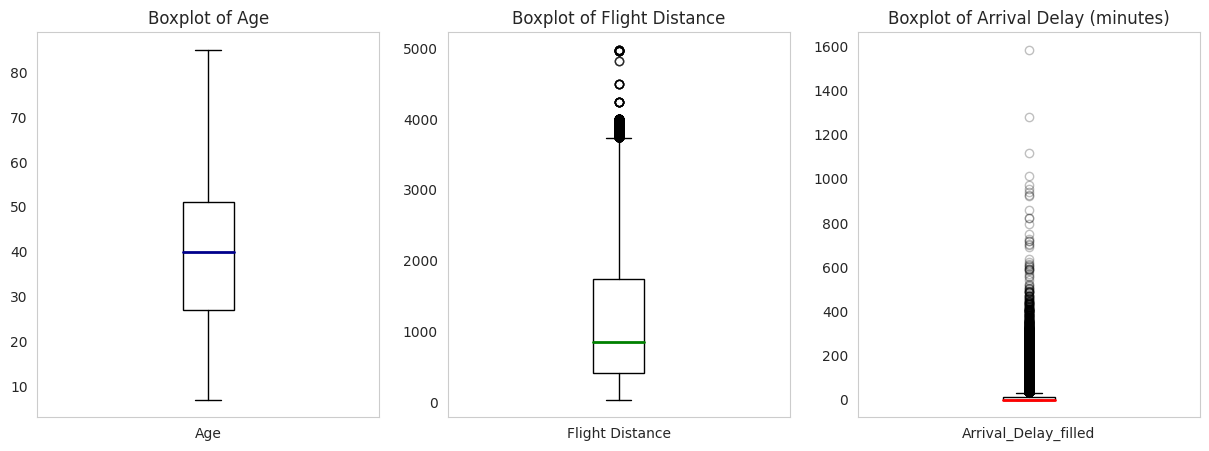

In [ ]:
# Draw boxplot of numeric variables
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharex = False, figsize = (15,5))
plt.subplot(1,3,1)
ax[0]=data_encode[['Age']].boxplot(grid = False, patch_artist = True, boxprops = dict(facecolor = "white"), medianprops = dict(color = "darkblue", linewidth = 2),
                                                                                whiskerprops = dict(color = "black"), flierprops = dict(marker = 'o', color = 'gray', alpha = 0.25))
plt.title('Boxplot of Age')
plt.subplot(1,3,2)
ax[1] = data_encode[['Flight Distance']].boxplot(grid = False, patch_artist = True, boxprops = dict(facecolor = "white"), medianprops = dict(color = "green", linewidth = 2),
                                                                                whiskerprops = dict(color = "black"), flierprops = dict(marker = 'o', color = 'gray', alpha = 0.25))
plt.title('Boxplot of Flight Distance')
plt.subplot(1,3,3)
ax[2] = data_encode[['Arrival_Delay_filled']].boxplot(grid = False,patch_artist = True, boxprops = dict(facecolor = "white"), medianprops = dict(color = "red", linewidth = 2),
                                                                                whiskerprops = dict(color = "black"), flierprops = dict(marker = 'o', color = 'gray', alpha = 0.25))
plt.title('Boxplot of Arrival Delay (minutes)')
plt.show()

> According to the above boxplots, Age seems to be normally distributed. On the contrary, Flight Distance and Arrival Delay had many outliers, which were outside of the IQR range. In addition, the majority of outliers were about below 600 minutes in Arrival Delay variable, according to the opacity of the outliers range. However, these outliers were still valid values, and there were no specific reasons to remove them, hence these extremely values were still remained in the dataset.

> According to the statistical summary table, the average passenger's age was 40 years old, and the average flight distance was about 844 miles. Additionally, passengers did not witness delay in their arrival on average since the median value of Arrival Delay was about 0.


## EDA


Because this dataset is survey's output, respondent's features should be balanced. After checking, passenger's gender are pretty balanced, meaning that the number of male passengers (represented as 1) and female passengers (represented as 0) are pretty the same.


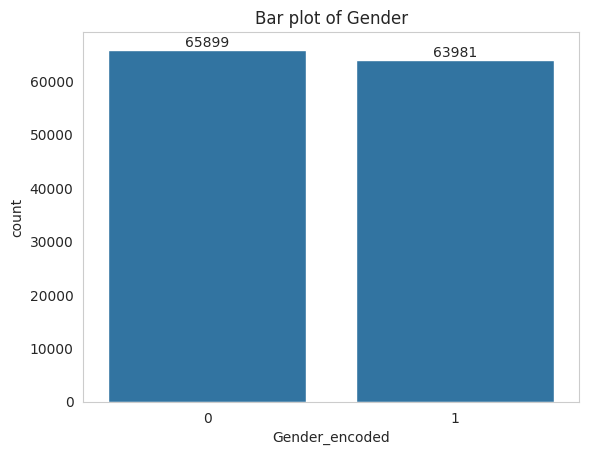

In [ ]:
ax = sns.countplot(x = data_encode['Gender_encoded'], order = data_encode['Gender_encoded'].value_counts(ascending=False).index)
abs_values = data_encode['Gender_encoded'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.grid(False)
plt.title('Bar plot of Gender')
plt.show()

### Average score of each criteria


In [ ]:
# Average score of flight's features
avg_score = pd.DataFrame(data_encode[cat_vars[4:-1]].astype('int64').mean()).reset_index()
avg_score.columns = ["Flight's features", 'Average score']
avg_score.sort_values(by = 'Average score')


,Flight's features,Average score
11,In-flight Wifi Service,2.728696
1,Ease of Online Booking,2.756876
4,Gate Location,2.976925
0,Departure and Arrival Time Convenience,3.057599
9,Food and Drink,3.204774
3,Online Boarding,3.252633
8,Cleanliness,3.286326
2,Check-in Service,3.306267
7,Leg Room Service,3.350878
12,In-flight Entertainment,3.358077


> The above table showed the average score for each flight's feature in ascending order. On average, In-flight Wifi service and Ease of Online Booking were the two worst features with the lowest average score of 2.73 and 2.76 respectively, compared to other features. On the contrary, In-flight Service and Baggage Handling gained the highest average scores of over 3.6. However, in general, the scores of these flight's criterion were not high because their scores only ranged from 2.7 to 3.6.

> In the below section, graphs were generated to illustrate the relationship between each factor and the target variable.


### Relationship between passenger's information and the overall Satisfaction


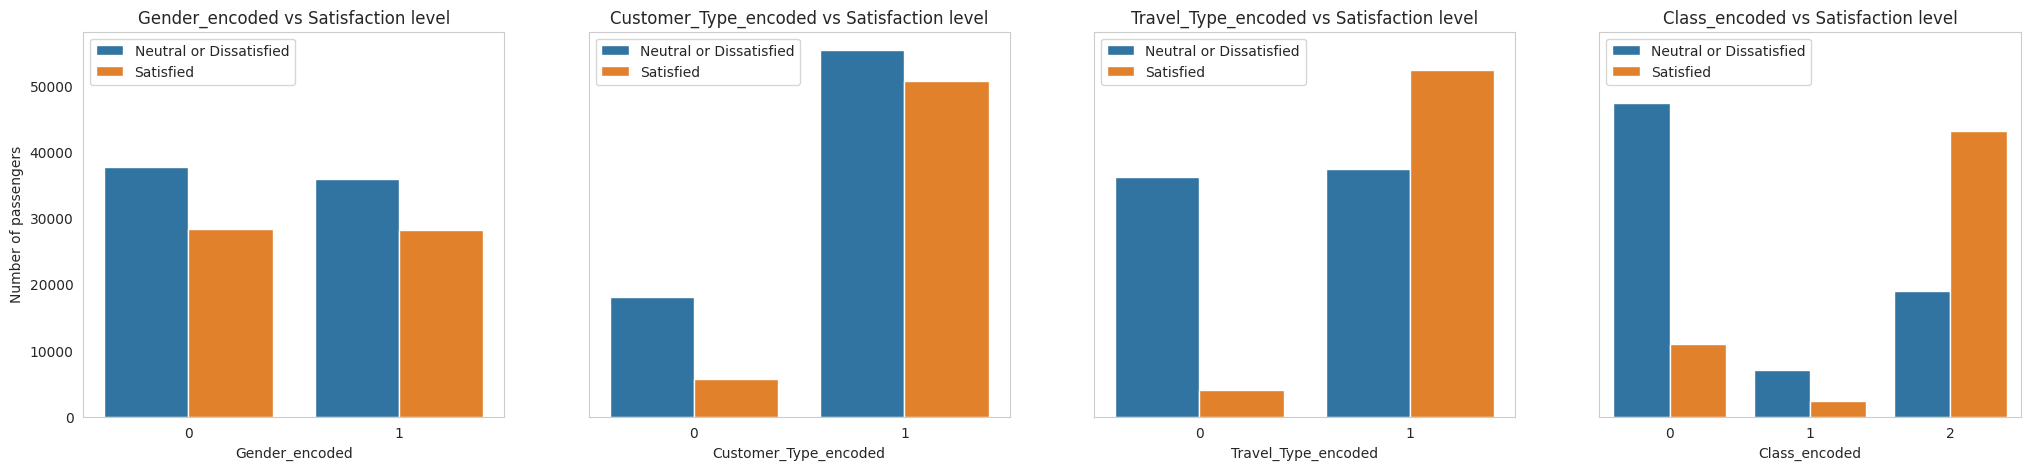

In [ ]:
# Draw count plot for Passenger information group with Satisfaction level
cnt = 0
fig, ax = plt.subplots(nrows = 1, ncols = 4, sharex = False, sharey = True, figsize = (25,5))

for i in ['Gender_encoded', 'Customer_Type_encoded', 'Travel_Type_encoded', 'Class_encoded']:
  cnt += 1
  plt.subplot(1,4,cnt)
  sns.countplot(data = data_encode, x = i, hue = 'Satisfaction')
  plt.grid(False)
  plt.legend(loc = 'upper left')
  plt.title(f'{i} vs Satisfaction level')
  plt.ylabel('Number of passengers')

> According to the above bar plots, Gender and Customer type may not have strong affect on the satisfaction level since the difference between the quantity of dissatified and satisfied passengers were not huge between their classes.

> In terms of Travel Type, it can be seen that to personal-purpose trips, the majority of passengers dissatisfied or neutral with their airplanes, which was significantly higher than the number of satisfied passengers. On the contrary, business-purpose trips witnessed the opposite situation since more passengers were satisfied.

> To Class variable, the quantity of satisfied passengers using Business class was about double the figure for the remaining group. However, to Economy and Economy plus classes, majority of passengers were dissatisfied or neutral, especially to Economy class, the number of dissatisfied or neutral passengers were over 4 times the figure for satisfied passengers.


### Relationship between numeric variables and the overall Satisfaction


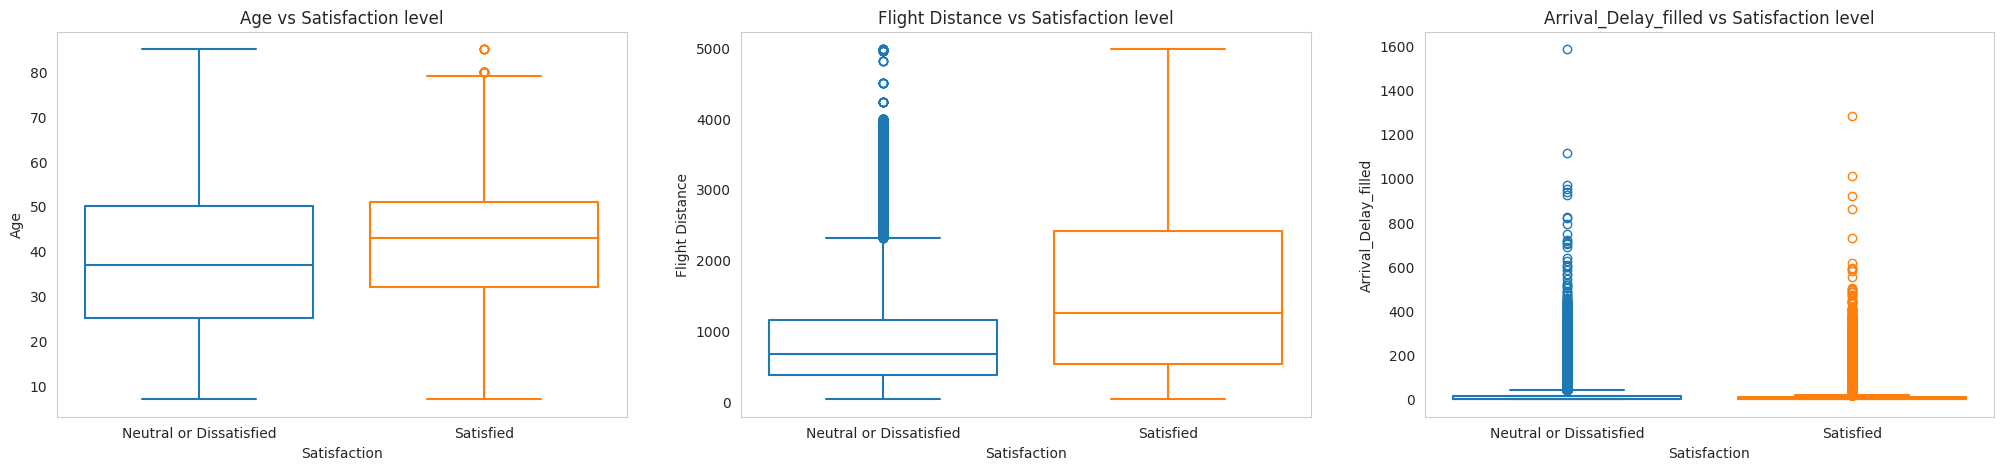

In [ ]:
# Draw boxplot for numerical variables with Satisfaction level
cnt = 0
fig, ax = plt.subplots(nrows = 1, ncols = 3, sharex = False, figsize = (25,5))
for i in ['Age', 'Flight Distance', 'Arrival_Delay_filled']:
  cnt += 1
  plt.subplot(1,3,cnt)
  sns.boxplot(data = data_encode, x = 'Satisfaction', y = i, fill = False, linecolor='black', hue = 'Satisfaction')
  plt.grid(False)
  plt.title(f'{i} vs Satisfaction level')

> According to the above boxplots, Arrival Delay variable may not bring huge effect on satisfaction level since the average arrival delay in both satisfied and disatisfied groups were pretty similar.

> There is a difference in the average age between both groups, however, this difference is pretty small, and their IQR range were overlapped with each other, which may not indicate a strong relationship between age and satisfaction level.

> It can be seen that the average flight distance in Satisfied group were higher than the figure for the remaining group. In addition, the IQR range of flight distance in Satified group is much further to the top of the boxplot, which means that Satisfied group contains more longer flights than the Dissatisfied and neutral group.


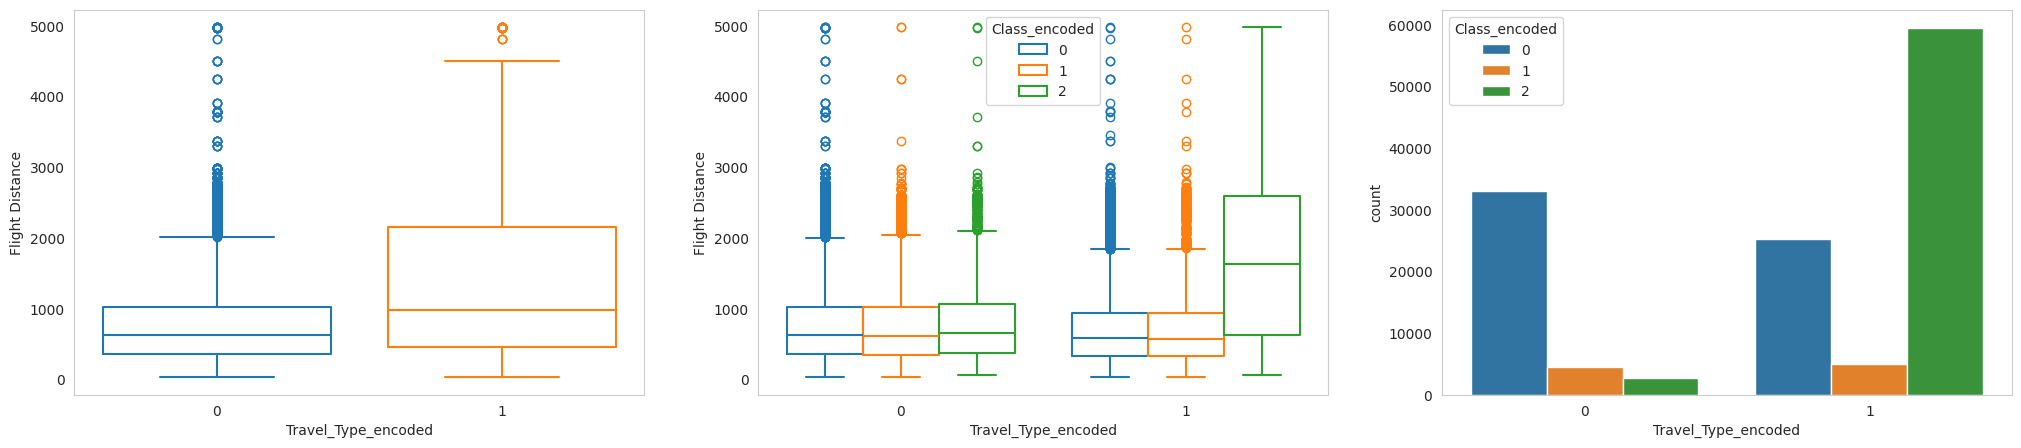

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (25,5))
plt.subplot(1,3,1)
sns.boxplot(data = data_encode, x = 'Travel_Type_encoded', y= 'Flight Distance', fill = False, linecolor='black', hue = 'Travel_Type_encoded', legend = False)
plt.grid(False)
plt.subplot(1,3,2)
sns.boxplot(data = data_encode, x = 'Travel_Type_encoded', y= 'Flight Distance', hue = 'Class_encoded', fill = False, linecolor='black')
plt.grid(False)
plt.subplot(1,3,3)
sns.countplot(data = data_encode, x = 'Travel_Type_encoded', hue = 'Class_encoded')
plt.grid(False)
plt.show()

> According to the above plots, passengers with business-purpose trips tended to travel longer routes, which was shown by the higher average flight distance in the first left boxplot. Hence, passengers may prefer to buy Business class tickets, especially when their flights were much longer, which can be seen in the second and the third plot. In the third boxplot, the quantity of Business class in Business travel type was doubled the quantity of Economy, and over 10 times higher than the number of Economy Plus class. In addition, while the average flight distance of Economy and Economy Plus in Business travel type were pretty similar to the figure for personal-purpose trips, the average flight distance of Business class was much greater, as presented in the second boxplot.

> In addition, since Business class has more benefits than other classes such as seat comfort, premium meals and drinks, priority check-in and boarding, complimentary amenity kits, legroom service,... passengers travelled with Business class tended to give higher scores for most flight's features such as Check-in Service, Online Boarding, On-board Service, Seat Comfort, Leg Room Service, Cleanliness, In-flight Service, and In-flight Entertainment, as shown in the below boxplots, and more likely to be satified with their flights than passengers travelling with Economy class.

> This also can explain for the situation observed above, which showed that the higher quantity of satisfied passengers gathered in Business group of Travel Type, greater values of Flight Distance, and Business class of Class variable.


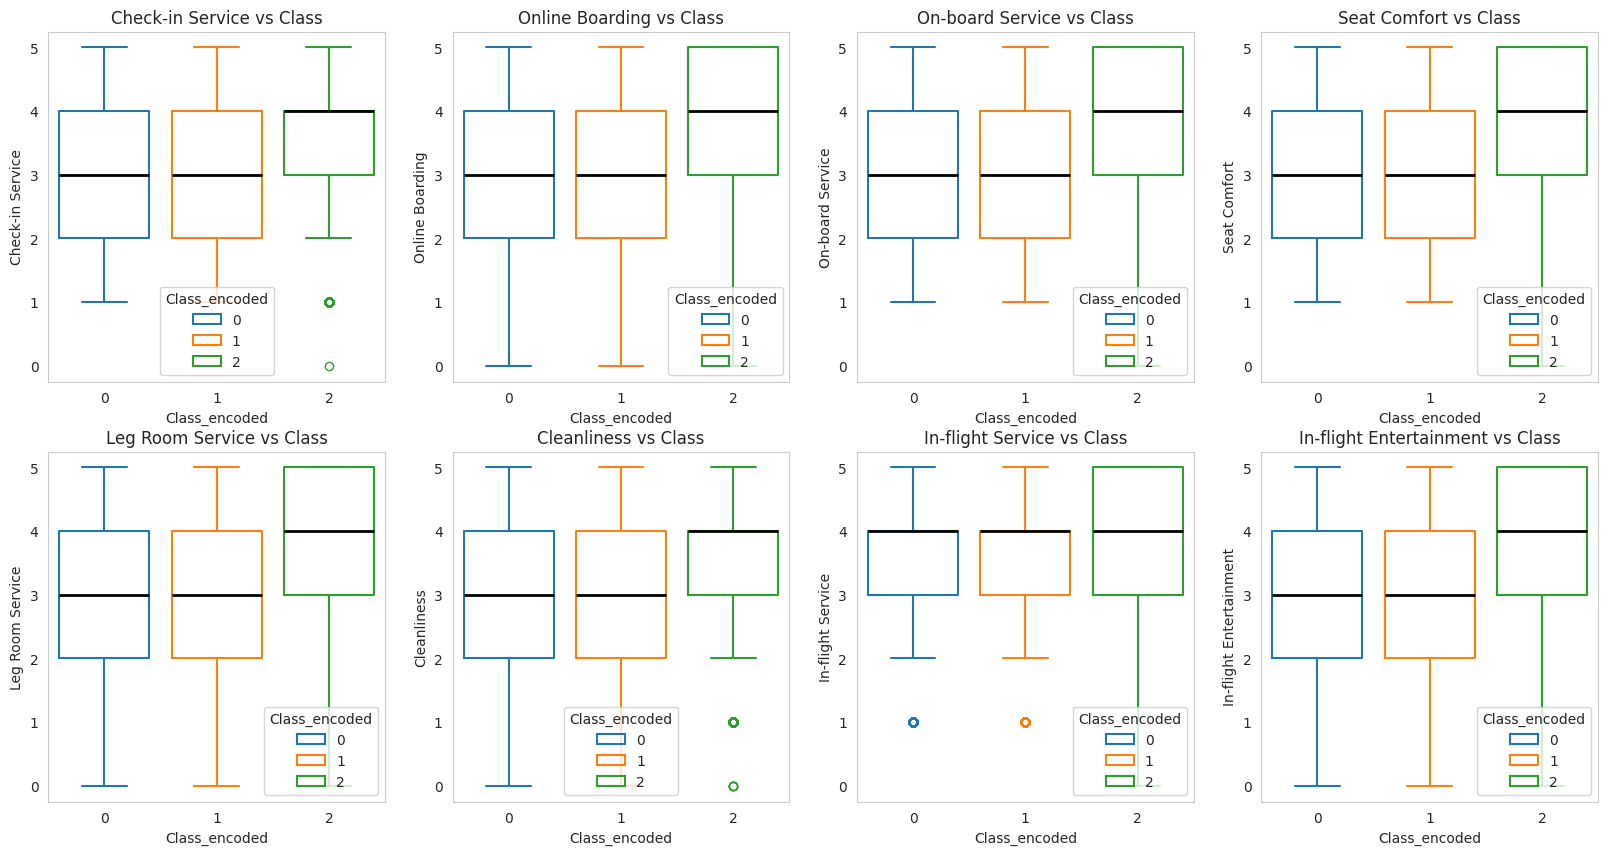

In [ ]:
# Draw boxplot for passenger's evaluation of flight's features, group by Class
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (20,10))
cnt = 0
for i in ['Check-in Service', 'Online Boarding',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'In-flight Service', 'In-flight Entertainment']:
      cnt += 1
      plt.subplot(2,4,cnt)
      plot = sns.boxplot(data = data_encode, x = 'Class_encoded', y = i, fill = False, linecolor='black', hue = 'Class_encoded', medianprops={"color": "black", "linewidth": 2})
      plt.grid(False)
      plot.invert_yaxis()
      plt.title(f'{i} vs Class')

plt.show()

> The below boxplots illustrated the relationship between passenger evaluation of flight's feature and the Satisfaction level.


### Relationship between each criteria and the overall Satisfaction


> Among all variables related to passenger evaluation of flight's features, factors might not have strong relationship with satisfaction level were Departure and Arrival Time Convenience, Ease of Online Booking, Gate Location, In-flight service, Baggage Handling because their avarage value between two satisfaction levels were pretty the same, as shown in below plots.


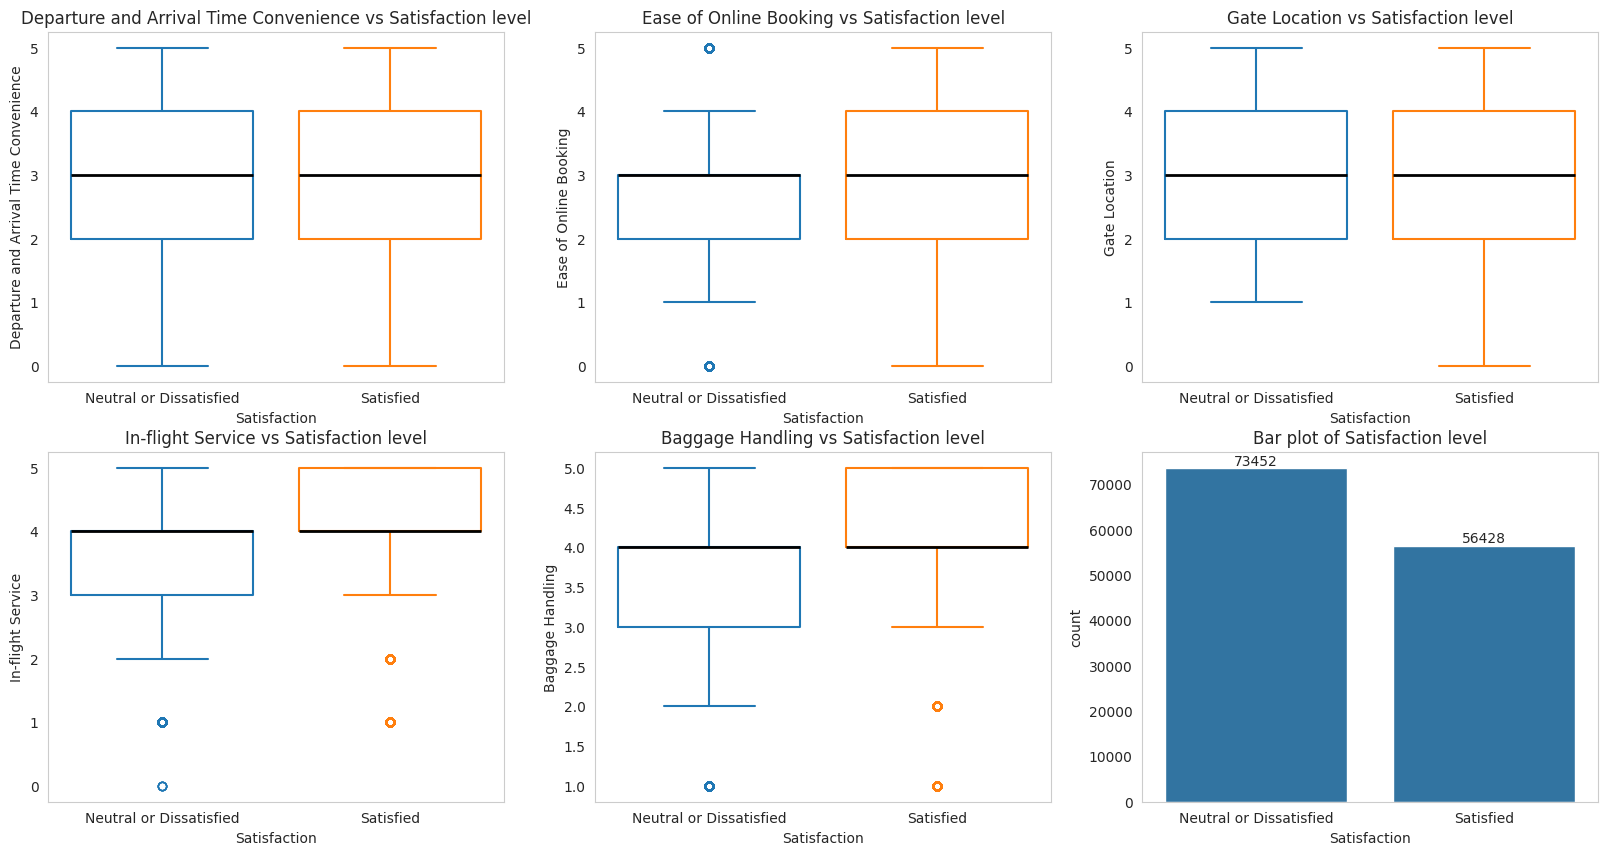

In [ ]:
# Draw boxplot for passenger's evaluation of flight's features, grouped by Satisfaction
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))
cnt = 0
for i in ['Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Gate Location',
       'In-flight Service', 'Baggage Handling']:
      cnt += 1
      plt.subplot(2,3,cnt)
      plot = sns.boxplot(data = data_encode, x = 'Satisfaction', y = i, fill = False, linecolor='black', hue = 'Satisfaction', medianprops={"color": "black", "linewidth": 2})
      plot.grid(False)
      plot.invert_yaxis()
      plt.title(f'{i} vs Satisfaction level')

plt.subplot(2,3, cnt+1)
ax = sns.countplot(x = data_encode['Satisfaction'], order = data_encode['Satisfaction'].value_counts(ascending=False).index)
abs_values = data_encode['Satisfaction'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.grid(False)
plt.title('Bar plot of Satisfaction level')

plt.show()

> To other variables, generally, when passengers give high score for these factors, they tend to be satisfied with their flight. It was because the average score of most factors in Satisfied group were higher than the figures for Dissatisfied or Neutral group.

> For example, Online Boarding factor can have a stronger positive relationship with satisfaction level since more than 75% of satisfied passengers give a score of 4 or above to this critera, while 75% dissatisfied or neutral passengers give only a score of 3 or below. Hence, if passengers give a score of 4 or above to this Online Boarding factor, it is more likely that they can be classified in Satisfied group.

> Similarly, it also can be seen that 75% passengers in Satisfied group give a score of 4 or above to the In-flight Entertainment factor, while the figures for the remaining group was only about 25%. Therefore, with a score of 4 or above, passengers are more likely to be satisfied with their flights.


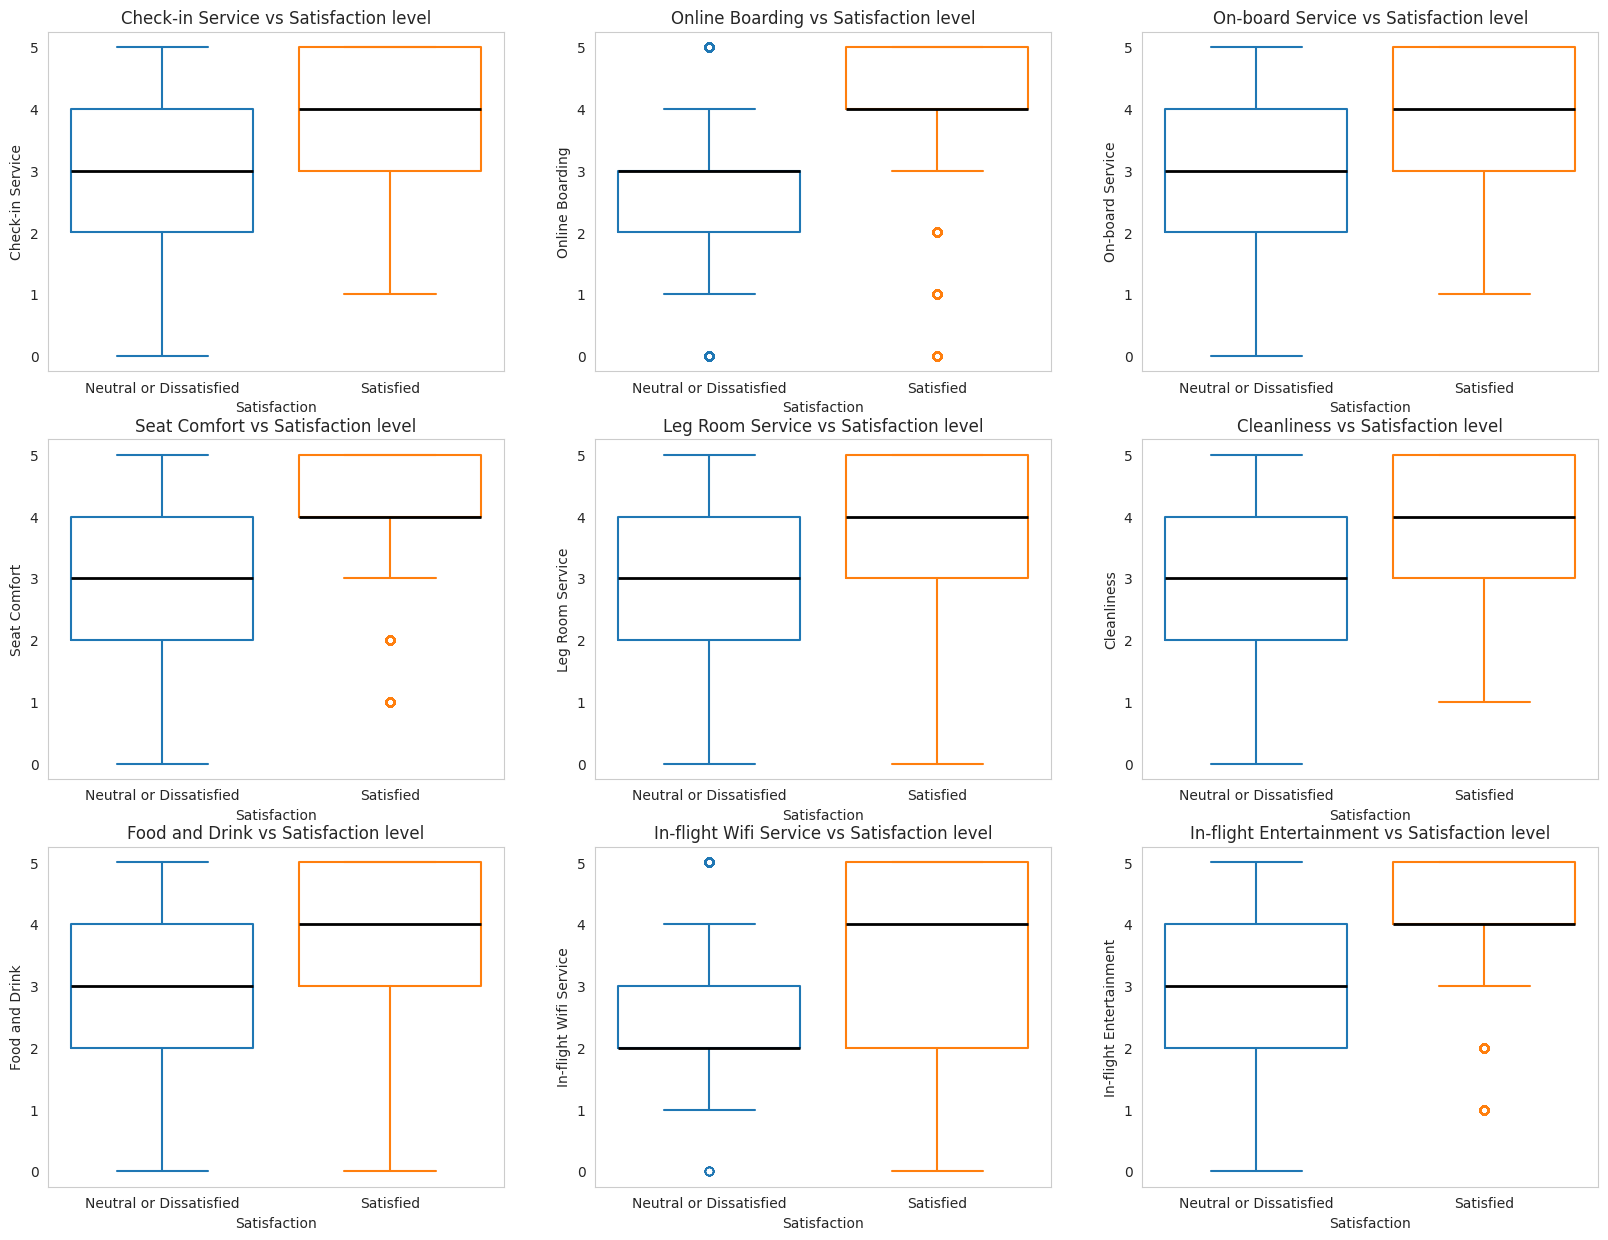

In [ ]:
# Draw boxplot for passenger's evaluation of flight's features, grouped by Satisfaction
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize = (20,15))
cnt = 0
for i in ['Check-in Service', 'Online Boarding',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Wifi Service','In-flight Entertainment']:
      cnt += 1
      plt.subplot(3,3,cnt)
      plot = sns.boxplot(data = data_encode, x = 'Satisfaction', y = i, fill = False, linecolor='black', hue = 'Satisfaction', medianprops={"color": "black", "linewidth": 2})
      plot.invert_yaxis()
      plot.grid(False)
      plt.title(f'{i} vs Satisfaction level')

plt.show()

## CONCLUSION


> After performing EDA on this Airline Quality Ratings dataset, there are several main points as following:

- Outliers existing in many numerical variables such as Flight Distance and Arrival Delay, however, these outliers were still in the valid range, and there are no specific reasons to remove them. Hence, these outliers were still kept in the dataset.
- In general, when passengers give high score for flight's features, they tend to be satisfied with their flights. It was because the average score of most factors in Satisfied group were higher than the figures for Dissatisfied or Neutral group.
- To business-purpose trips, passengers tended to travel longer routes than personal-purpuse trips. Therefore, they prefer to use Business class, especially when their flights were much longer. Since Business class has more advantages than other classes such as priority check-in and boarding, seat comfort, legroom,..., passengers tend to give higher scores for these flight's features, and hence they are more likely to be satisfied with their flights.
- In comparison with other flight's features, In-flight Wifi service and Ease of Online Booking were the two worst features with the average score of only 2.73 and 2.76 respectively, evaluated by 130000 passengers. It can be because In-flight Wifi quality has lower bandwidth and speed, due to the limitations of the technology and the distance involved, which can result in poor performance, slow loading, and disconnection.
- Most of other features gained average scores only between about 3 and 3.6. This means that all these criterion should improved in the future. However, several features, having stronger relationship with satisfaction level, should be paid more attention, which are Check-in Service, Online Boarding, On-board Service, Seat Comfort, Leg Room Service, Cleanliness, Food and Drink, In-flight Wifi Service, In-flight Entertainment.
- There are several ways to enhance these criterion. For example, the airline can implement more flexible seating arrangements to improve seat comfort, invest in machines which can assist passengers with online boarding and online check-in more quickly and smoothly, redesign in-flight menu to meet customers' preferences, needs, and expectations, and research for new and more cost-effective Wifi solutions to increase Wifi quality on planes.
